#### **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [3]:
df = pd.read_csv("D:/Projects for Data Analyst/Capstone Project/Project 02/BlinkIT Grocery Data.csv")

**Sample Data**

In [4]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [5]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


**Size of Data**

In [6]:
print("Size of the data: ", df.shape)

Size of the data:  (8523, 12)


**Field Info**

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**Data Types**

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

**Data Cleaning**

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'reg':'Regular'})

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**BUSINESS REQUIREMENTS**

**KPI's REQUIREMENTS**

In [12]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales=df['Sales'].mean()

#No of Item Sold
no_of_items_sold = df['Sales'].count()

#Average Rating
avg_rating = df['Rating'].mean()

#Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: #{avg_sales:,.0f}")
print(f"No of Items Sold:{no_of_items_sold:,.0f}")
print(f"Average Rating:{avg_rating:,.1f}")

Total Sales: $1,201,681
Average Sales: #141
No of Items Sold:8,523
Average Rating:4.0


**CHART REQUIREMENTS**

 **Total sales by Fat content**

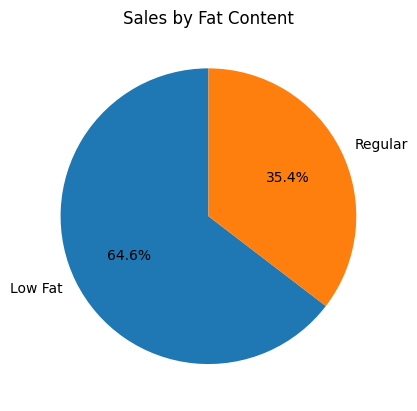

In [13]:
Sales_by_Fat =df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(Sales_by_Fat, labels=Sales_by_Fat.index,
        autopct='%.1f%%',startangle=90)
plt.title('Sales by Fat Content')
plt.show()

**Total Sales by Item Type**

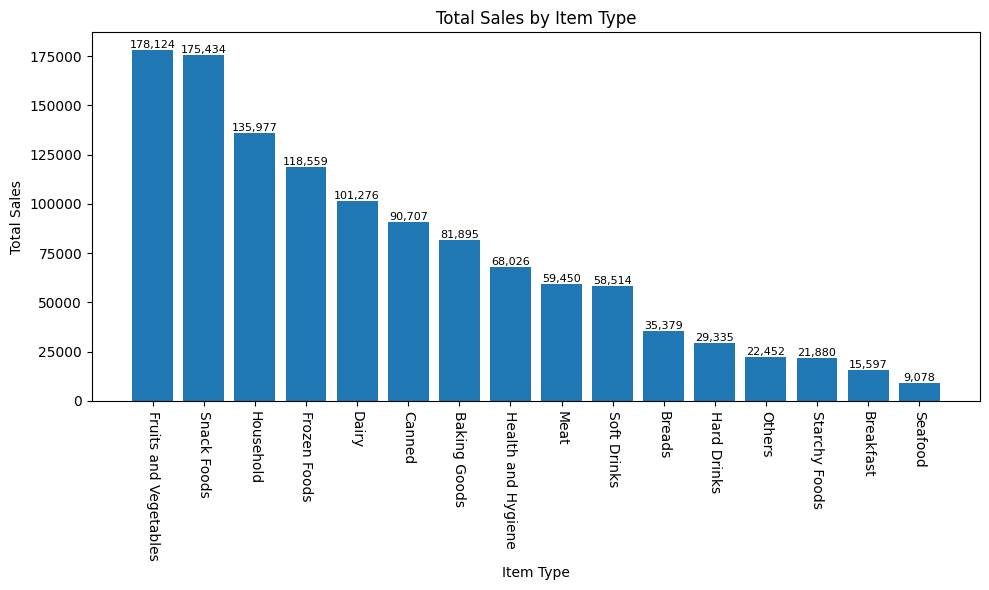

In [14]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
    f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
    
plt.tight_layout()
plt.show()

